In [199]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [200]:
data = pd.read_csv('/content/personal loan predicition.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [201]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [202]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [203]:
#data['Gender'].unique()

In [204]:
data['Gender']=data['Gender'].map({'Female':1,'Male':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,0.0,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,0.0,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,0.0,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,0.0,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [205]:
data['Property_Area']=data['Property_Area'].map({'Urban':2, 'Semiurban': 1, 'Rural':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,2
1,0.0,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,2
2,0.0,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,2
3,0.0,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,2
4,0.0,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,2


In [206]:
data['Married']=data['Married'].map({'Yes':1,'No':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1,0,Graduate,No,5720,0,110.0,360.0,1.0,2
1,0.0,1,1,Graduate,No,3076,1500,126.0,360.0,1.0,2
2,0.0,1,2,Graduate,No,5000,1800,208.0,360.0,1.0,2
3,0.0,1,2,Graduate,No,2340,2546,100.0,360.0,NaN,2
4,0.0,0,0,Not Graduate,No,3276,0,78.0,360.0,1.0,2


In [207]:
data['Education']=data['Education'].map({'Graduate':1, 'Not Graduate':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1,0,1,No,5720,0,110.0,360.0,1.0,2
1,0.0,1,1,1,No,3076,1500,126.0,360.0,1.0,2
2,0.0,1,2,1,No,5000,1800,208.0,360.0,1.0,2
3,0.0,1,2,1,No,2340,2546,100.0,360.0,NaN,2
4,0.0,0,0,0,No,3276,0,78.0,360.0,1.0,2


In [208]:
data['Self_Employed']=data['Self_Employed'].map({'Yes':1, 'No':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,2
1,0.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,2
2,0.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,2
3,0.0,1,2,1,0.0,2340,2546,100.0,360.0,NaN,2
4,0.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,2


In [209]:
data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [210]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [211]:
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [212]:
data['Dependents']=data['Dependents'].str.replace('+','') #0 1 2 3+ ---- 3

<ipython-input-212-2accd703ef08>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents']=data['Dependents'].str.replace('+','') #0 1 2 3+ ---- 3


In [213]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [214]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [215]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])

In [216]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [217]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [218]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    float64
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    float64
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 31.7+ KB


In [220]:
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64') 
data['Dependents']=data['Dependents'].astype("Int64")
data['Self Employed']=data['Self_Employed'].astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data ['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    Int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    float64
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    int64  
 8   Loan_Amount_Term   367 non-null    int64  
 9   Credit_History     367 non-null    int64  
 10  Property_Area      367 non-null    int64  
 11  Self Employed      367 non-null    int64  
dtypes: Int64(1), float64(1), int64(10)
memory usage: 34.9 KB


In [222]:
## Data visualization

<ipython-input-223-4b78f43a4171>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'], color='r')
<ipython-input-223-4b78f43a4171>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])


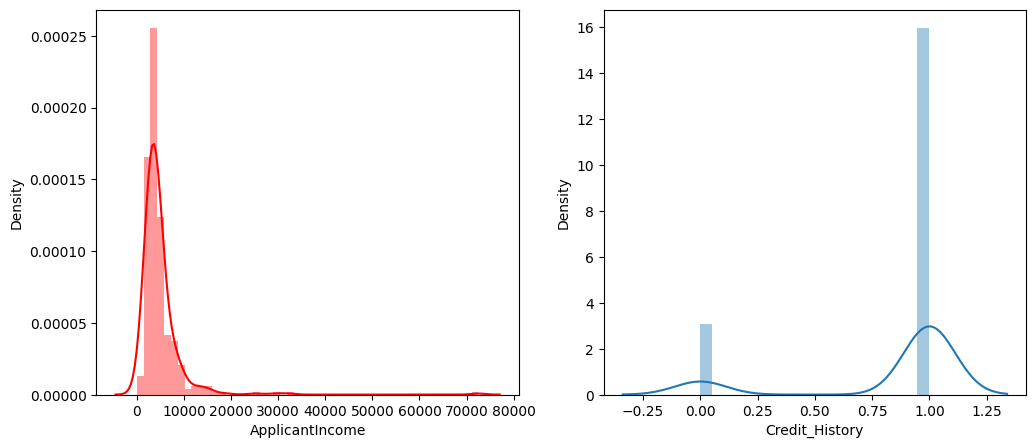

In [223]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

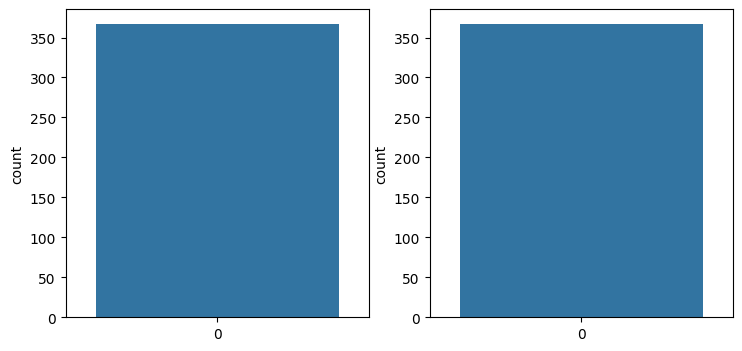

In [224]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1) 
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

In [225]:
pd.crosstab(data['Gender'],[data['Self_Employed']])

Self_Employed,0.0,1.0
Gender,,
0,264,33
1,66,4


In [226]:
from imblearn.combine import SMOTETomek

In [227]:
smote = SMOTETomek()

In [228]:
sc=StandardScaler()
x_bal=sc.fit_transform

In [229]:
x_bal

<bound method TransformerMixin.fit_transform of StandardScaler()>

In [230]:
def RandomForest(X_tarin,x_test,y_train,y_test):
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    y_tr = model.predict(X_train) 
    print(accuracy_score(y_tr,y_train))
    yPred = model.predict(X_test)
    print(accuracy_score(yPred,y_test))

In [231]:
def decisionTree(X_train,x_test,y_train,y_test):
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    y_tr = model.predict(X_train)
    print(accuracy_score(y_tr,y_train)) 
    yPred = model.predict(X_test)
    print(accuracy_score(yPred,y_test))

In [232]:
def KNN(X_train,X_test,y_train,y_test): 
    model = KNeighborsClassifier()
    model.fit(X_train,y_train)
    y_tr = model.predict(X_train)
    print(accuracy_score (y_tr,y_train))
    yPred = model.predict(x_test)
    print(accuracy_score(yPred,y_test))

In [233]:
def XGB(X_train,X_test,y_train,y_test):
    model = GradientBoostingClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    yPred = model.predict(X_test)
    print(accuracy_score(yPred,y_test))

In [234]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [235]:
classifier = Sequential()
classifier.add(Dense(units=100, activation='relu', input_dim=11))

In [236]:
classifier.add(Dense(units=50, activation='relu'))

In [237]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [238]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [239]:
rf = RandomForestClassifier()

In [240]:
parameters = {
               'n_estimators' : [1,20,30,55,68,74,90,120,115], 
                'criterion':['gini','entropy'], 
                'max_features' : ["auto", "sqrt", "log2"], 
        'max_depth' : [2,5,8,10], 'verbose' : [1,2,3,4,6,8,9,10]

}

In [241]:
RCV = RandomizedSearchCV(estimator=rf, param_distributions=parameters, cv=10,n_iter=4)

In [242]:
def RandomForest(X_tarin,X_test,y_train,y_test):
    model = RandomForestClassifier(verbose= 9, n_estimators= 120, max_features= 'log2',max_depth=8, criterion= 'entropy')
    model.fit(X_train,y_train)
    y_tr = model.predict(X_train) 
    print("Training Accuracy")
    print(accuracy_score (y_tr,y_train))
    yPred = model.predict(X_test) 
    print('Testing Accuracy')
    print(accuracy_score(yPred,y_test))

In [243]:
pickle.dump(model,open('rdf.pkl','wb'))

NameError: ignored